In [22]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [3]:
data=pd.read_fwf('brain_body.txt')

In [4]:
data.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [5]:
data.dtypes

Brain    float64
Body     float64
dtype: object

In [6]:
data.shape

(62, 2)

In [7]:
data.isnull().sum()

Brain    0
Body     0
dtype: int64

In [8]:
data.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


interpreting from dataframe description
- there is huge difference between 75% and max value of both brain and body 
- there is need to check for outliers from both feature (Brain weight) and body weight(target)


In [9]:
iqr=data["Brain"].quantile(0.75)-data["Brain"].quantile(0.25)
upper_range=data["Brain"].quantile(0.75)+(1.5*iqr)
lower_range=data["Brain"].quantile(0.25)-(1.5*iqr)
print(upper_range,lower_range)

119.60625 -70.80375000000001


- there is vast difference between maximum value and upper_range 
- similarly for minimum value and lower_range

In [10]:
data["Brain"]=data["Brain"].clip(-70.8037,119.606)

In [12]:
# iqr for body
Q3=data["Body"].quantile(0.75)
Q1=data["Body"].quantile(0.25)
iqr=Q3-Q1
upper_range=Q3+(1.5*iqr)
lower_range=Q1-(1.5*iqr)
print(lower_range,upper_range)

-238.375 408.625


- there is large difference between maximum value of body and upper range
- in the similar way for lower range

In [13]:
data["Body"]=data["Body"].clip(-238.37,408.62)

##### EDA

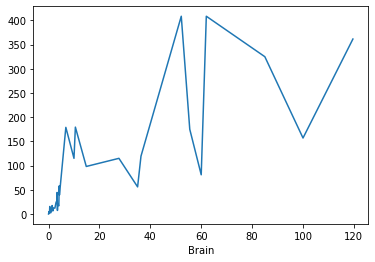

In [20]:
data.groupby('Brain')["Body"].mean().plot()
# data.plot(x="Brain",y="Body",style="o")
plt.show()

In [21]:
data[["Brain","Body"]].corr()

,Brain,Body
Brain,1.000000,0.888241
Body,0.888241,1.000000


the correlation  is 0.88, it has good linear relationship

In [24]:
X=data[["Brain"]].values
y=data[["Body"]].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [29]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred=regressor.predict(y_test)

In [32]:
regressor.intercept_

array([16.71879998])

In [33]:
regressor.coef_

array([[2.92331007]])

 1. Find the linear regression equation for this data for brain weight to body weight.

In [34]:
# Body=(2.9233)*Brain+16.7187

2. Find the equation's  𝑅2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [35]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)

-5.859129885648201

the R^2 score is in negative value so it is not god fit for the data